#  04 Image Enhancement and Bitwise Operations
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ncGhEFufnaEDTTrZzkt7u47qgCs9UT3Q?usp=sharing)

In this module, we explore how to enhance images using **mathematical operations** and **bitwise logic** in OpenCV.  
You'll learn how to apply techniques such as:

- Brightness and contrast manipulation
- Global and adaptive thresholding
- Creating and applying binary masks
- Combining foreground and background with bitwise operations (AND, OR, XOR, NOT)

These are essential building blocks in computer vision tasks such as:
- Document scanning
- Object isolation
- Background replacement
- Image compositing





---

By the end of this notebook, you'll have built a complete image masking and compositing pipeline using bitwise operations on a Coca-Cola logo and a checkerboard background.



##1.Importation of libraries

In [69]:
# importation of libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

##2.Conversion from BGR to RGB

OpenCV reads images in **BGR (Blue, Green, Red)** format by default. However, most image display libraries like `matplotlib` expect images in **RGB** format. Therefore, it's necessary to convert the image from BGR to RGB using `cv2.cvtColor()` before displaying it.

The line `Image(filename='New_Zealand_Coast.jpg')` displays the image as-is in a Jupyter or Colab notebook using IPython's display system. It does not require conversion because it reads the file directly, not the pixel values.


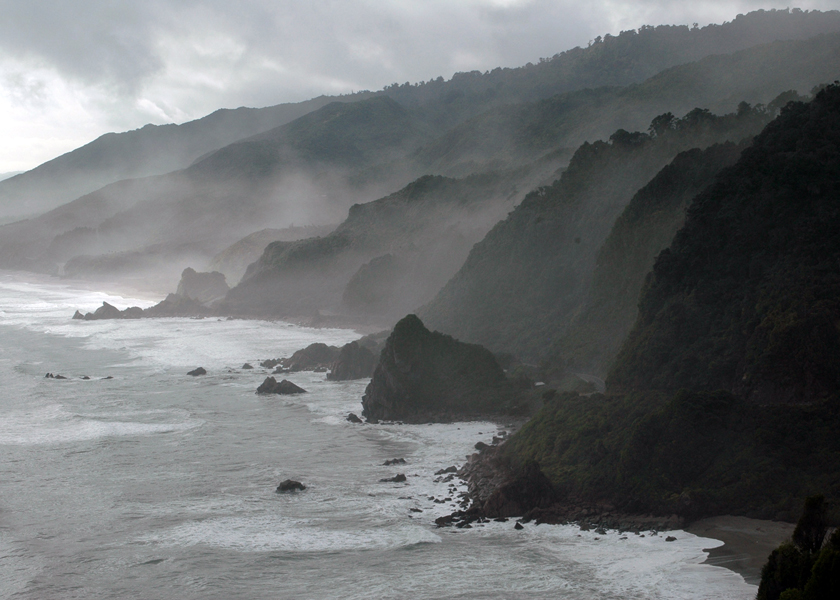

In [70]:
bgr_image=cv2.imread("New_Zealand_Coast.jpg",cv2.IMREAD_COLOR) #REading in color
rgb_image=cv2.cvtColor(bgr_image,cv2.COLOR_BGR2RGB) #Here  the convertion only to read
#Displaying
Image(filename='New_Zealand_Coast.jpg')# Although the IPython do use opereation even the if its not converted , itwill show the original color without converstion

##3.Addition of Brightness

Brightness adjustment is a **global enhancement** technique where the intensity of every pixel in the image is increased or decreased uniformly.

- To increase brightness, a constant matrix (e.g., 50) is **added** to each pixel.
- To decrease brightness, the same constant is **subtracted**.

The `cv2.add()` and `cv2.subtract()` functions automatically handle saturation:
- Values over 255 are clipped to 255.
- Values below 0 are clipped to 0.

This ensures no wraparound artifacts occur.


Text(0.5, 1.0, 'Dark')

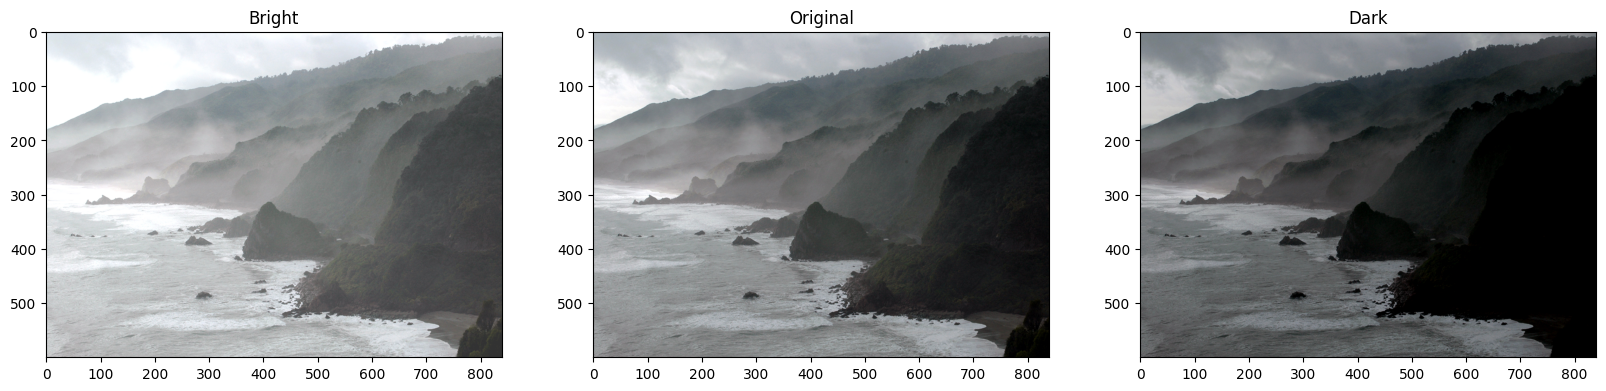

In [71]:
#Brightness=Global increasea and decrease of intensity of value of each pixel

brightness=np.ones(rgb_image.shape,dtype='uint8')*50 #MAking every channel or dimention multiplied by 50 ,dtype is a must
rgb_image_bright=cv2.add(rgb_image,brightness) #Then adding that value to increase the vlaue of every pixel intensity due according to channel
rgb_image_dark=cv2.subtract(rgb_image,brightness) #Similarly subtracting

#Matplotlib
plt.figure(figsize=[20,5])
plt.subplot(131);plt.imshow(rgb_image_bright);plt.title("Bright")
plt.subplot(132);plt.imshow(rgb_image);plt.title("Original")
plt.subplot(133);plt.imshow(rgb_image_dark);plt.title("Dark")



## 4.Contrast Adjustment

Contrast adjustment modifies the **intensity difference** between pixels:
- **Higher contrast** increases the difference between light and dark regions.
- **Lower contrast** reduces that difference, flattening details.

This is done using pixel-wise **multiplication**:

- A factor > 1 (e.g., 1.2) makes bright pixels brighter and dark pixels darker.
- A factor < 1 (e.g., 0.5) compresses the range of intensities, reducing contrast.

In this example, we intentionally avoid clipping the output to 255 before converting back to `uint8`. As a result:
- **Pixel values exceeding 255** wrap around due to integer overflow.
- This causes **garbage colors**, which visually demonstrate what happens when you skip `np.clip()`.

This behavior is important to understand when you're debugging contrast artifacts or working with raw OpenCV data transformations.


Text(0.5, 1.0, 'Low Contrast')

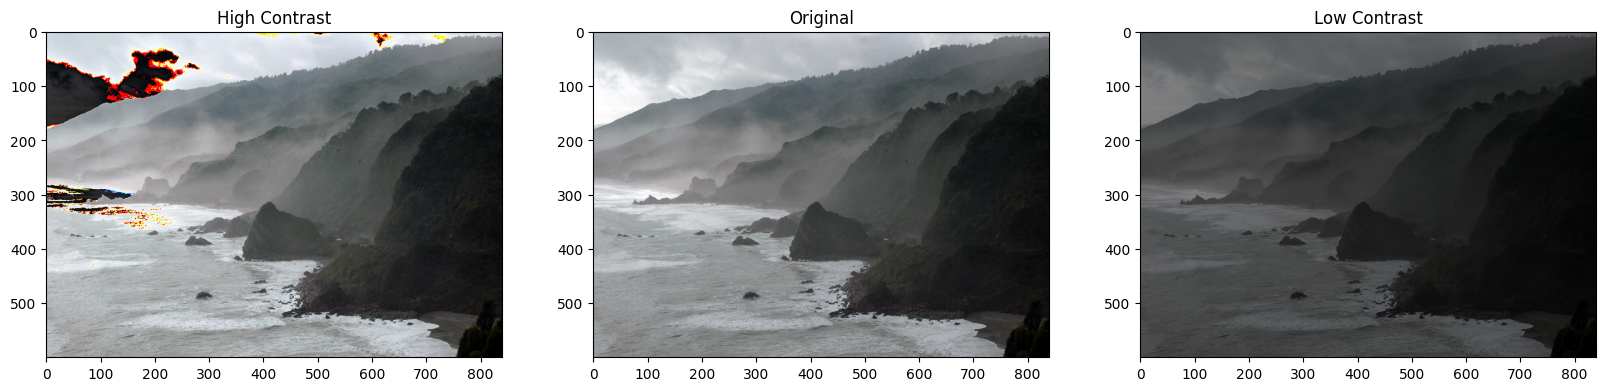

In [72]:
#Adding and substracting can make brightness similarly multiplying make contrast
contrast_bright=np.ones(rgb_image.shape) *1.2
contrast_dark=np.ones(rgb_image.shape) *0.5

rgb_image_contast_bright=np.uint8(cv2.multiply(np.float64(rgb_image),contrast_bright))
rgb_image_contrast_dark=np.uint8(cv2.multiply(np.float64(rgb_image),contrast_dark))
rgb_image_contast_bright=np.uint8(rgb_image_contast_bright)
#Matplotlib
plt.figure(figsize=[20,5])
plt.subplot(131);plt.imshow(rgb_image_contast_bright);plt.title("High Contrast")
plt.subplot(132);plt.imshow(rgb_image);plt.title("Original")
plt.subplot(133);plt.imshow(rgb_image_contrast_dark);plt.title("Low Contrast")

#What happned?? overflow
#If seen ther hight contrast images shows very garbage color which is due to those pixels when multuplies by 1.2 here it exceeds the 255 value
#As we know colors either rgb or gray the value should be under 255

###4.1Contrast Adjustment with Clipping

When adjusting contrast through multiplication, pixel values may exceed the valid range of 0–255. If you convert these directly to `uint8` without handling them, you'll get wraparound artifacts (e.g., 270 becomes 14).

To prevent this:
- Use `np.clip()` to limit values within the `[0, 255]` range.
- Then safely convert the image back to `uint8`.

This ensures:
- **No garbage colors**
- **Bright areas appear white** instead of wrapping around

Clipping is a standard and necessary step in most real-world image processing pipelines to avoid unintended visual artifacts.


Text(0.5, 1.0, 'Low Contrast')

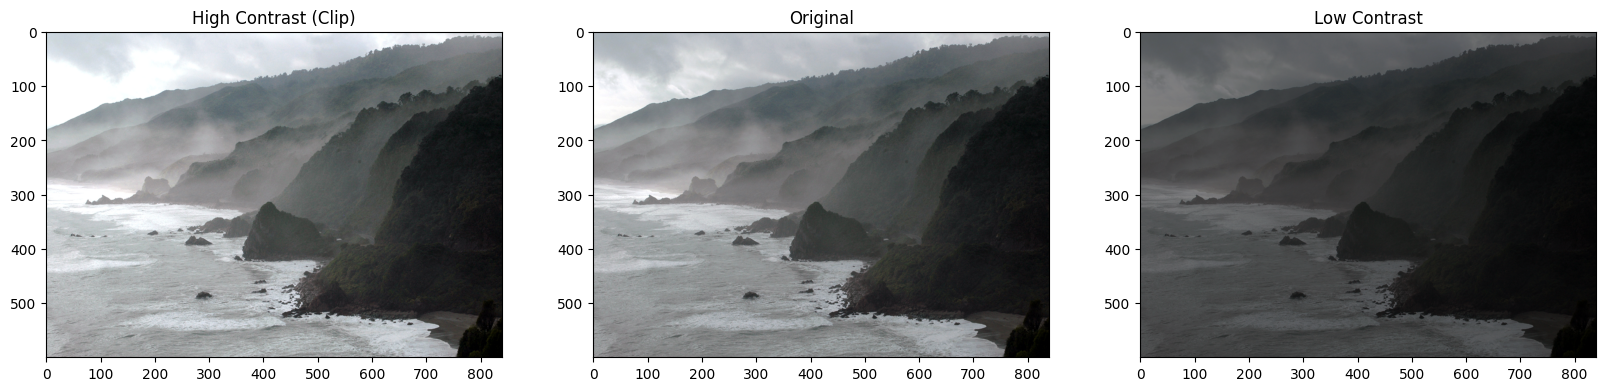

In [73]:
#Adding and substracting can make brightness similarly multiplying make contrast
contrast_bright=np.ones(rgb_image.shape) *1.2

#The numpy funclion cli and the range it should be in ,0-255
rgb_image_contast_bright=np.uint8(np.clip(cv2.multiply(np.float64(rgb_image),contrast_bright),0,255))

#Matplotlib
plt.figure(figsize=[20,5])
plt.subplot(131);plt.imshow(rgb_image_contast_bright);plt.title("High Contrast (Clip)")
plt.subplot(132);plt.imshow(rgb_image);plt.title("Original")
plt.subplot(133);plt.imshow(rgb_image_contrast_dark);plt.title("Low Contrast")

#See the high contrast the pixels where the garbage value cant exceeds 255 and its pure white now


##5.Image Thresholding

Thresholding is a technique to create a **binary image** by converting all pixel values above a certain threshold to one value (e.g., 255) and all others to another value (e.g., 0).

#### Syntax:
```python
retval, threshold_image = cv2.threshold(src, thresh, maxval, type)


(572, 800)


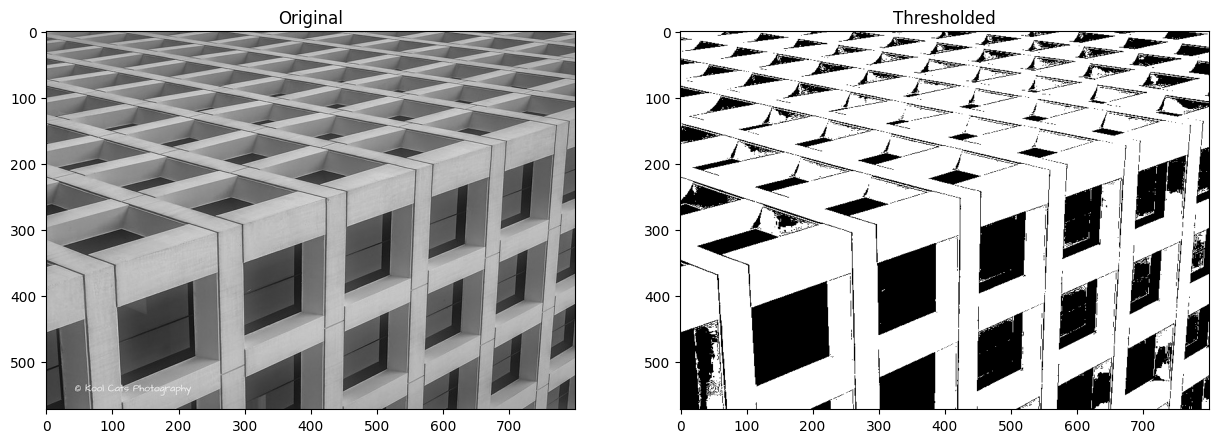

In [74]:
#retval,threshold_image=cv2.threshold(src_image,threshold,max_value,threshold_type) takes 4 arguments
src_image=cv2.imread("building-windows.jpg",cv2.IMREAD_GRAYSCALE)#Reading in grayscale is must
#Thresholding
retval, threshold_image =cv2.threshold(src_image,thresh=100,maxval=255,type=cv2.THRESH_BINARY)#??Why out is in tuple and what is thresh binarytype?

#Matplotlib
plt.figure(figsize=[15,5])

plt.subplot(121);plt.title("Original");plt.imshow(src_image,cmap='gray')
plt.subplot(122);plt.title("Thresholded");plt.imshow(threshold_image,cmap='gray')

#To the dimention/shape
print(threshold_image.shape) #572,800 # theres only 2 channel why , is it coz im reading in grayscale or threshold binary doing that?

###5.1Application of Thresholding – Music Sheet Detection

Thresholding is commonly used in document processing tasks such as:
- Handwriting recognition
- Text extraction
- Edge sharpening
- Music sheet digitization

In this example, we compare:
1. **Global thresholding** using `cv2.threshold()` — works based on a fixed intensity value.
2. **Adaptive thresholding** using `cv2.adaptiveThreshold()` — computes threshold per region, adapting to lighting variation across the image.

#### `cv2.adaptiveThreshold()` parameters:
- **src**: Grayscale input image
- **maxValue**: Value assigned to pixels exceeding threshold
- **adaptiveMethod**:
  - `cv2.ADAPTIVE_THRESH_MEAN_C`: Mean of the local block
  - `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`: Weighted mean using a Gaussian window
- **thresholdType**: Typically `cv2.THRESH_BINARY`
- **blockSize**: Size of the pixel neighborhood (must be odd and > 1)
- **C**: Constant subtracted from the mean (helps fine-tune the threshold)

Adaptive thresholding clearly outperforms the global method here by preserving finer note details under varying lighting in the image.


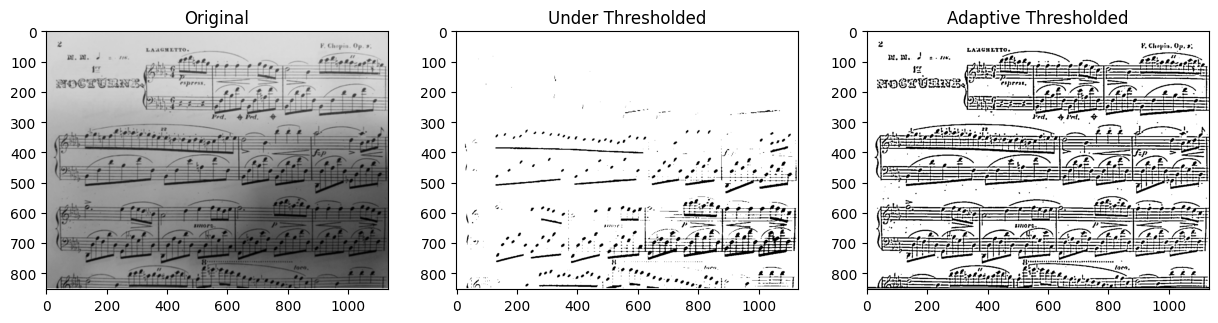

In [89]:
#retval,img=sv2.adaptiveThreshold(src_image, maxValue, adaptive_method, type, block size, Contant) Takes 6 arguments adding

#1st raeading the source image in grayscale
music_sheet_img=cv2.imread('Piano_Sheet_Music.png',cv2.IMREAD_GRAYSCALE)

#Now retval and src image thresholding using binary threshold
retval,music_sheet_thresh=cv2.threshold(music_sheet_img,thresh=50,maxval=255,type=cv2.THRESH_BINARY) #Usual 4 arguments
#Now lets use the adaptive threshold instead of binary
adaptive_thresh_img=cv2.adaptiveThreshold(music_sheet_img,
                                          maxValue=255,
                                          adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
                                          thresholdType=cv2.THRESH_BINARY,#use thresholdType , not type
                                          blockSize=11,
                                          C=7) #C is the contant which gonne be substarcted ??


#Matplotlib
plt.figure(figsize=[15,5])

plt.subplot(131);plt.title("Original");plt.imshow(music_sheet_img,cmap='gray')
plt.subplot(132);plt.title("Under Thresholded");plt.imshow(music_sheet_thresh,cmap='gray') #most o dthe notes are now 255
plt.subplot(133);plt.title("Adaptive Thresholded");plt.imshow(adaptive_thresh_img,cmap='gray')

#Its clearly adaptive threshold which wins this


##6.Bitwise Operations in OpenCV

Bitwise operations such as `AND`, `OR`, `XOR`, and `NOT` are useful for combining shapes, applying masks, and isolating specific regions of interest region in an image.

In this section, we work with two simple binary images:
- One contains a **rectangle**
- The other contains a **circle**

These images must:
- Be **grayscale** (1 channel)
- Have the **same size** for bitwise operations to work correctly

We'll visualize and then apply bitwise logic to combine or manipulate them.


dimention of rectangle image(200, 499)
dimention of circle(200, 499)


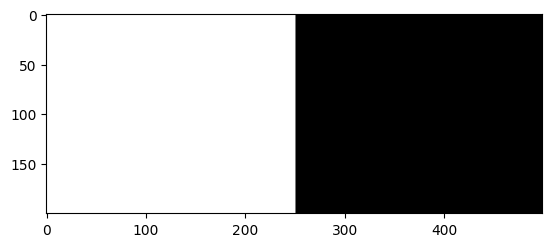

In [90]:
#Reading images in grayscale
rectangle_img=cv2.imread("rectangle.jpg",cv2.IMREAD_GRAYSCALE)
circle_img=cv2.imread("circle.jpg",cv2.IMREAD_GRAYSCALE)

# Print image dimensions
print(f'dimention of rectangle image{rectangle_img.shape}\ndimention of circle{circle_img.shape}')

# Display rectangle image
plt.imshow(rectangle_img,cmap='gray')


###6.1Bitwise AND Operation

The bitwise `AND` operation returns a new image where:
- Only pixels that are **non-zero (white)** in both source images are preserved.
- All other pixels are set to zero (black).

This is useful when you want to compute the **intersection** between two binary masks or shapes.

#### Syntax:
```python
output = cv2.bitwise_and(src1, src2[, mask])


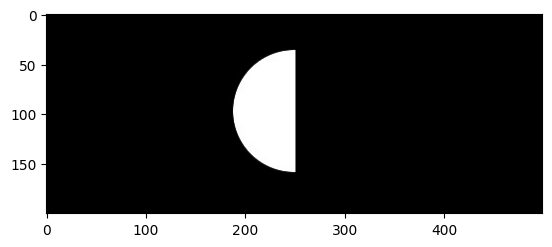

In [77]:
#output_image=cv2.bitwise_OPERATOR(src_img_1,src_img_2,[,mask]) #2Arguments and 1 non essential mask argument

#AND Operator
and_bitwise=cv2.bitwise_and(rectangle_img,circle_img)
plt.imshow(and_bitwise,cmap='gray')



###6.2Bitwise OR Operation

The bitwise `OR` operation returns a new image where:
- A pixel is white (`255`) if it is white in **either** of the source images.
- This effectively computes the **union** of the two shapes or masks.

This operation is helpful when combining multiple ROIs or layers into one.

#### Syntax:
```python
output = cv2.bitwise_or(src1, src2[, mask])


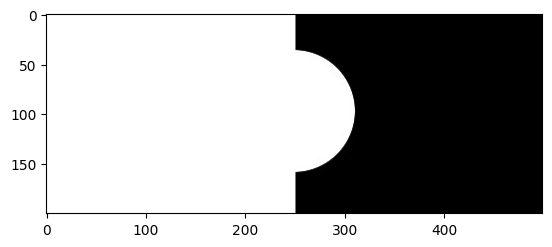

In [78]:
#OR Operator
or_bitwise=cv2.bitwise_or(rectangle_img,circle_img)
plt.imshow(or_bitwise,cmap='gray')



###6.3.Bitwise XOR Operation

The bitwise `XOR` (exclusive OR) operation returns a new image where:
- A pixel is white (`255`) **only if it is white in one image and black in the other**.
- If both pixels are black or both are white, the result is black.

This operation computes the **non-overlapping union** or **difference** between two masks or shapes.

#### Syntax:
```python
output = cv2.bitwise_xor(src1, src2[, mask])


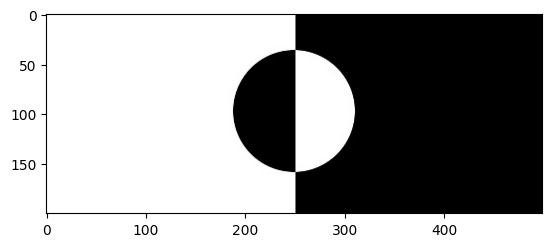

In [79]:
#Bitwise XOR operator

xor_bitwise=cv2.bitwise_xor(rectangle_img,circle_img)
plt.imshow(xor_bitwise,cmap='gray')



##7. Application of Bitwise Operations – Coca-Cola Logo

To demonstrate the application of bitwise operations in a real scenario, we start with a Coca-Cola logo image.

- The image is read using OpenCV (`cv2.imread`) which loads it in **BGR format**.
- We convert it to **RGB format** for proper display using Matplotlib.
- The `.shape` property tells us:
  - Image height
  - Image width
  - Number of channels (3 = RGB, meaning 24 bits per pixel)

This image will be used as the **foreground** in upcoming masking operations.


(700, 700, 3)

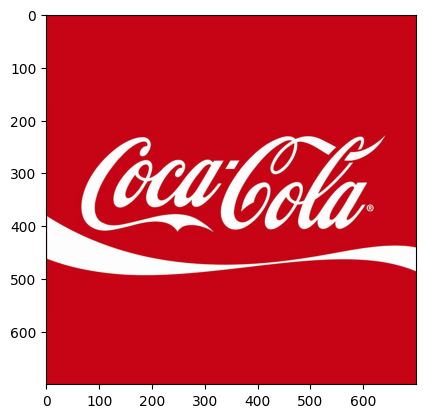

In [80]:
#Reading the image in color
coke_img_bgr=cv2.imread("coca-cola-logo.png",1)

#Changing from bgr to rgb
coke_img_rgb=cv2.cvtColor(coke_img_bgr,cv2.COLOR_BGR2RGB)

plt.imshow(coke_img_rgb)

#Shape to see the height & width of the picture
coke_img_rgb.shape #700=h 700=w ,3 channel=rgb=24 bits in 1 pixel


###7.1 Preparing the Background Image

We now load a checkerboard pattern image to serve as the **background** for our masking operation.

- It is read in **BGR format**, and then converted to **RGB** for proper display.
- The `.shape` attribute confirms:
  - Height = 1800 pixels
  - Width  = 1800 pixels
  - Channels = 3 (RGB)

Since the Coca-Cola foreground image was 700x700 pixels, we will need to **resize this background** to match that size before combining them.


(1800, 1800, 3)

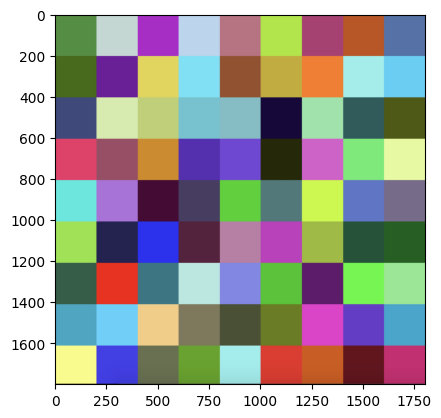

In [81]:
#Reading the image in color
background_img_bgr=cv2.imread("checkerboard_color.png",1)

#Changing from bgr to rgb
background_img_rgb=cv2.cvtColor(background_img_bgr,cv2.COLOR_BGR2RGB)

plt.imshow(background_img_rgb)

#Shape to see the height & width of the picture
background_img_rgb.shape #1800=h 1800=w ,3 channel=rgb=24 bits in 1 pixel
#As the shape in previous line is vediffrent than the foreground image coca cola wehave to make it equal

###7.2 Resizing the Background Image

To successfully apply bitwise operations (like masking or overlaying),
the **foreground and background images must have the same dimensions**.

- The Coca-Cola logo was 700x700 pixels.
- The checkerboard background was 1800x1800.

Using `cv2.resize()`, we scale the background down to 700x700 so that it matches the dimensions of the foreground image. This allows for proper pixel-wise operations between the two.


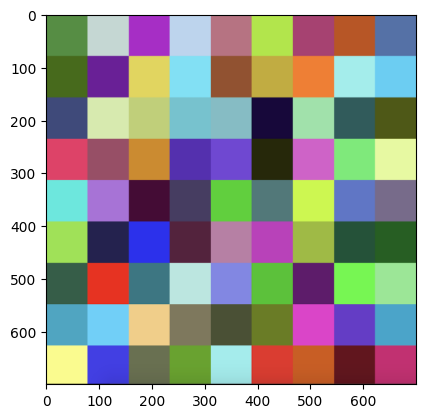

In [82]:
#Resize
background_img_rgb_resized=cv2.resize(background_img_rgb,(700,700))
background_img_rgb_resized.shape #Now the image is equal to our foreground picture
plt.imshow(background_img_rgb_resized)

###7.3 Creating a Binary Mask

To isolate the foreground (Coca-Cola logo), we first convert it to **grayscale** using `cv2.cvtColor()`.

Then, we apply a **binary threshold** to generate a mask:
- All pixels > 127 become `255` (white)
- All pixels ≤ 127 become `0` (black)

This results in a binary mask that separates the **logo (foreground)** from the **transparent/irrelevant background**.

The shape of the mask matches the original image dimensions but has **only one channel** (grayscale).


(700, 700)


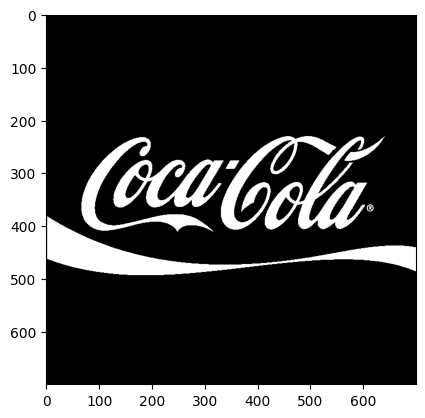

In [83]:
# Convert RGB Coca-Cola image to grayscale
img_gray = cv2.cvtColor(coke_img_rgb, cv2.COLOR_RGB2GRAY)

# Apply global thresholding to creat a binary mask of the logo
retval, img_mask = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)

plt.imshow(img_mask,cmap="gray")
print(img_mask.shape)

###7.4 Inverse Mask

To apply bitwise operations selectively, we often need both:
- The **original mask** (to preserve the foreground)
- The **inverse mask** (to preserve the background)

Using `cv2.bitwise_not()`, we flip the mask:
- Black becomes white, and
- White becomes black

This inverse will later help in masking out regions from the **background image**.


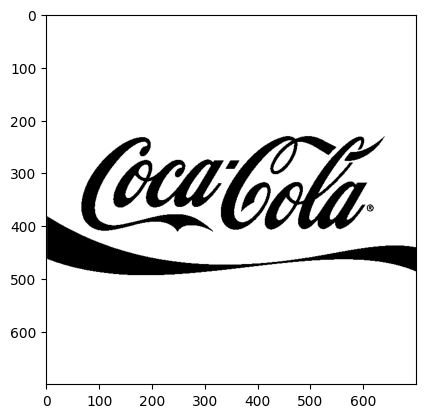

In [84]:
# Create an inverse mask
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv,cmap="gray")

###7.5. Applying the Logo Mask to the Background

We use `cv2.bitwise_and()` to extract only those parts of the **background image** that fall under the white areas of the **logo mask**.

This means:
- The **text/logo areas** (white in the mask) are kept from the background.
- The rest is set to black.

Effectively, we are preparing the **colored background layer that fits exactly behind the logo text**, as if the text were cut out.


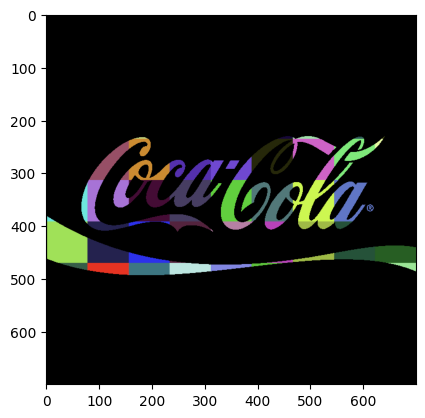

In [85]:
# Create colorful background "behind" the logo lettering
img_background = cv2.bitwise_and(background_img_rgb_resized,background_img_rgb_resized, mask=img_mask)
plt.imshow(img_background)

###7.6. Isolating the Foreground Using the Inverse Mask

We now extract the actual **Coca-Cola logo** (red regions) using the **inverse mask**.

Using `cv2.bitwise_and()`:
- Only the pixels where the inverse mask is white (`255`) are retained.
- This keeps the **logo**, and removes everything else.

This produces a clean foreground image ready to be overlaid on top of the masked background.


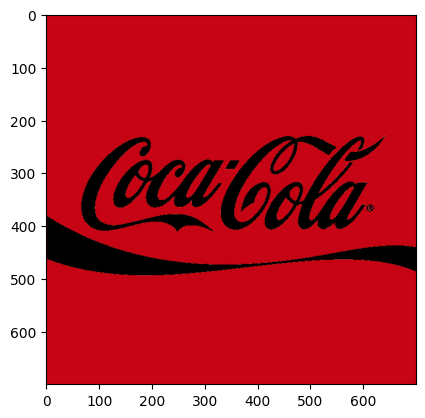

In [86]:
# Isolate foreground (red from original image) using the inverse mask
img_foreground = cv2.bitwise_and(coke_img_rgb, coke_img_rgb, mask=img_mask_inv)
plt.imshow(img_foreground)

###7.7.  Final Composite – Combining Foreground and Background

Now that we have:
- The **masked background** (visible only under logo text)
- The **isolated foreground** (logo with background removed)

We combine them using `cv2.add()` to create the final composite image.

This overlays the logo on top of the custom background seamlessly.

Finally, we save the result using `cv2.imwrite()`:
- Note: We convert from **RGB to BGR** (`result[:, :, ::-1]`) since OpenCV writes images in BGR format.


True

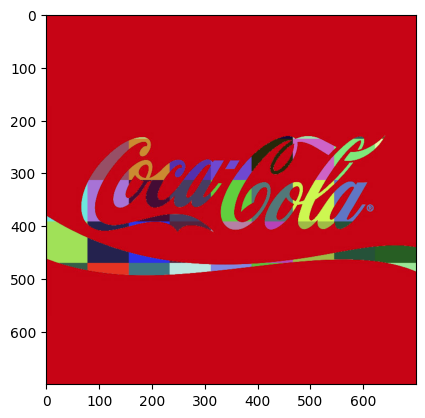

In [87]:
# Add the two previous results obtain the final result
result = cv2.add(img_background,img_foreground)
plt.imshow(result)
cv2.imwrite("logo_final.png", result[:,:,::-1])

---

## Navigation

[![⬅️ Previous Module](https://img.shields.io/badge/Prev.Module-03-blue?style=for-the-badge&logo=github)](https://github.com/Adityeah18/opencv/tree/main/03)
&nbsp;&nbsp;&nbsp;
[![➡️ Next Module](https://img.shields.io/badge/Next.Module-05-blue?style=for-the-badge&logo=github)](https://github.com/Adityeah18/opencv/tree/main/05)
